# Starbucks Data Analysis and Customer Segmentation

## Information about the project

In the following project we will analyze Sturbucks customer data. The datset contains demographic, financial and marketing attributes. The purpose of this project is to analyze, identify and group customers based on similarities. In the end we will propose some adjustments and highlight crucial information about the already existing marketing campaing. The ultimate goal will be to create a new marketing strategy that better suits customer needs.

The economical benefits will be the following:
* Adjusting the focus to customer needs will provide higher future revenue.
* It will provide a strong basis for further analysis/modeling.


### About the Dataset

1. profile.csv - demographic and financial data about customers (17.000 customers and 5 columns)

2. portfolio.csv - data about offers sent to customers (10 offers and 6 columns)

3. transcript.csv - customer response to offers and transactions made (306.648 events and 4 columns)


### Basic information about the dataset

1. Customer Data (profile CSV) --- Contains 17.000 Customers and their age, gender, income and the date when they have become a member.

2. Portfolio Data(portfolio.csv) --- Contains the 10 offers that Sturbucks created in their marketing campaign to reach further customers.

3. Transcript Data (transcript.csv) --- Contains all the action and results about the campaign.

The actions are:
   * offer received
   * offer viewed
   * offer completed
   * transaction(purchase made by the customer)



### Analysis steps:

#### 1. Preprocess the data

In the preprocess step we will:
* Import Librarys
* Read in the data
* Clean and transform the data

#### 2. Exploratory Data Analysis(EDA)

Conduct EDA on the three DataFrames individually to obtain a thorough understanding of the data. Univariate analysis was conducted on all DataFrames, providing a summary on the statistics of all variables of each subject (offers, customers and events) in the data. Bivariate analysis was used on customer demographic data to understand the empirical relationship between age, gender and income for the company's customers.

#### 3. Feature Engineering

Create new variables that measures the successrate of our offers.
In this analysis, popularity of offers is measured by its overall completion rate. 
Completing an offer usually requires two actions from the customers - to view it, and then complete it (by making the purchase). Therefore, from an action-oriented perspective, the overall completion rate was broken down into two metrics:

* View rate (number of times an offer being viewed divided by number of times being received)
* Completion rate (number of times an offer being completed divided by number of times being viewed)

## Findings

#### About Customer information

1. There are more males (57.2%) than females (41.3%) customers, and a small amount (1.4%) of customers of other genders.
2. Customer age ranges from 18 to 101, roughly following a normal distribution with the mean and standard deviation being 54 and 17. Customers in senior and youth generation groups (40-80 years old) account for 70% of all customers.
3. Customer income (30 - 120k) is skewed to the right, having a mean of 65.4k and a standard deviation of 21.6k. Customers with an income between 45k-75k account for approximately 50% of all customers.
4. There is a higher proportion of young people in male customer than in other genders, and (therefore) male customers have a lower average income than other gender groups.
5. In general, customers in younger age groups have an average income lower than those in more senior age groups. Customers in the two younger age groups (18-35 years old) has an average annual income of about 51k. The middle age groups (36-55 years old) has an average annual income of about 65k. All age groups above 56 years old have very similar average annual income of round 70k.

#### About Transactions

1. In the dataset, there are about 140k transactions (purchases), slightly above 4 times of offers completed - many purchases were made without an offer.
2. Approximatly 76k offers were received by customers, 76% of which were viewed and 44% were completed.
3. An offer completion peak occurred on the same day every time offers were sent to customers.
4. Offer completion peaks tend to lead to a short-lived (about 2 days) boost on the number of transactions. This demonstrates that proper offer sending can help form short customer buying habbit.

#### About the currently existing marketing strategy

1. Overall Completion Rate: Offers with top 3 popularity were Offer F, E and B. Achieving an overall completion rate of 70%, 67.4% and 56.7%, respectively.

2. View Rate: the most important factor affecting the view rate is the promotion channel through which offers were received by customers. All channels contributed to offer view rate, however their importance is the following: Social Media > Email > Mobile > Websites. This is the overall tendency.

3. Completion Rate: the main factor affecting the completion rate is the offer type. Specifically, customers preferred 'discount' offers to 'bogo' offers. Offer duration also positively influenced the completion rate.

## Recommendations

The effect of each individual offer is short-term, therefore the company should send offers to customers at a certain frequency to help form purchasing habbit.
In order to improve the effectiveness of offers, the company should make efforts to improve both offer view rate and offer complete rate. Promotional channel is the most important factor influencing the offer view rate.

### The following should be considered regarding promotional channels:

1. The company should make sure to send offers through social media to all customer (especially to younger customers, between 18-35 years old as they viewed over 60% offers there).
2. Offers should be sent through Email and mobile Apps to most customer (especially for those whose income is between 45-105k).
3. To save budget, website offers should only be sent to customers with incomes above 75k.

### The followings should be considered regarding offer types:

1. Send more 'discount' offers than other types as it is preferred by customers in all age, gender and income groups
2. Allow customers enough time (up to 10 days) to complete their offers.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
#pd.set_option('mode.chained_assignment',  None)
#pd.set_option('display.max_columns', None)

### Read in the data

In [2]:
profile = pd.read_csv('profile.csv', index_col = 0)
profile.head()

,gender,age,id,became_member_on,income
0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [3]:
portfolio = pd.read_csv('portfolio.csv', index_col = 0)
portfolio.head()


,reward,channels,difficulty,duration,offer_type,id
0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [4]:
transcript = pd.read_csv('transcript.csv', index_col = 0)
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


### 1. Preprocess the data

Check the missing values

In [5]:
profile.isna().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [6]:
portfolio.isna().sum()

reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64

In [7]:
transcript.isna().sum()

person    0
event     0
value     0
time      0
dtype: int64

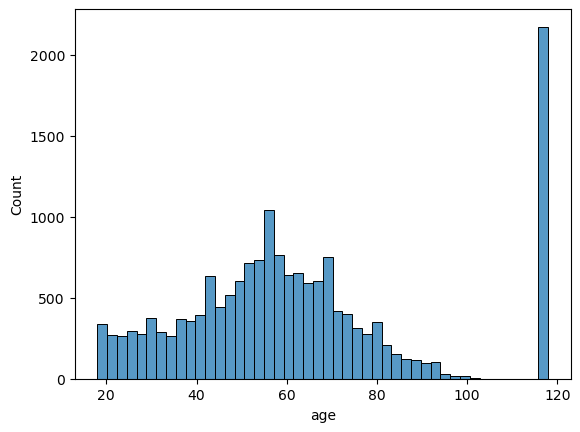

In [8]:
sns.histplot(data=profile, x='age')
plt.show()

In [9]:
#The suspicious age is 118.
#And the people who have suspicious age also have null value of 'gender' and 'income'.
profile['age'].describe()

count    17000.000000
mean        62.531412
std         26.738580
min         18.000000
25%         45.000000
50%         58.000000
75%         73.000000
max        118.000000
Name: age, dtype: float64

In [10]:
#Remove the false values.
profile = profile.dropna()
profile.head()

,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0


Check and correct datatype missmatches

In [11]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               14825 non-null  int64  
 2   id                14825 non-null  object 
 3   became_member_on  14825 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 694.9+ KB


In [12]:
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format='%Y%m%d')
profile.head()

,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0


In [13]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 560.0+ bytes


In [14]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 11.7+ MB


In [15]:
# Sort offers
portfolio = portfolio.sort_values(['offer_type', 'difficulty']).reset_index(drop = True)

# Add column `offer_alias`
from string import ascii_uppercase
portfolio['offer_alias'] = [ascii_uppercase[i] for i in range(portfolio.shape[0])]
portfolio

,reward,channels,difficulty,duration,offer_type,id,offer_alias
0,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,A
1,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,B
2,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,C
3,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,D
4,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,E
5,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,F
6,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5,G
7,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,H
8,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed,I
9,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837,J


In [16]:
# Elements in value_columns are strings. Convert them to dictionaries
value_column = transcript['value']
value_column = value_column.apply(eval)
value_column[:3]

0    {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1    {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2    {'offer id': '2906b810c7d4411798c6938adc9daaa5'}
Name: value, dtype: object

In [17]:
# Extract the keys
dictionary_key_column = [list(d.keys())[0] for d in value_column]
# Extract the values
dictionary_value_column = [list(d.values())[0] for d in value_column]
# Create a df containing the keys and values of the dictionary elements of `value_column`
value_column_split = pd.DataFrame(columns = ['dict_key', 'dict_value'])
value_column_split['dict_key'] = dictionary_key_column
value_column_split['dict_value'] = dictionary_value_column
value_column_split.head(3)

,dict_key,dict_value
0,offer id,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,offer id,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,offer id,2906b810c7d4411798c6938adc9daaa5


In [18]:
# Replace `value` column with df `value_column_split`
df_transcript_value_mod = transcript.drop('value', axis = 1)
df_transcript_value_mod = pd.concat([df_transcript_value_mod, value_column_split], axis = 1)

In [19]:
col_names = ['person', 'event', 'dict_key', 'dict_value']
df_transcript_value_mod = df_transcript_value_mod[col_names]
df_transcript_value_mod

,person,event,dict_key,dict_value
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,offer id,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,a03223e636434f42ac4c3df47e8bac43,offer received,offer id,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,e2127556f4f64592b11af22de27a7932,offer received,offer id,2906b810c7d4411798c6938adc9daaa5
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,offer id,fafdcd668e3743c1bb461111dcafc2a4
4,68617ca6246f4fbc85e91a2a49552598,offer received,offer id,4d5c57ea9a6940dd891ad53e9dbe8da0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,amount,1.59
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,amount,9.53
306531,a00058cf10334a308c68e7631c529907,transaction,amount,3.61
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,amount,3.53


## EDA Analysis on customer data

### Gender

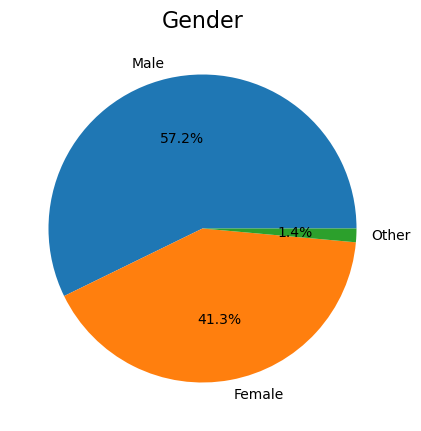

In [20]:
wedge_size =  profile['gender'].value_counts()
wedge_label = ['Male', 'Female', 'Other']
plt.figure(figsize = (5,5))
plt.pie(x = wedge_size, labels = wedge_label, autopct = '%1.1f%%')
plt.title('Gender', fontsize = 16)
plt.show()


Observations: There are more males (57.2%) than females (41.3%) customers, other gender is 1.4% of the total population.

### Age

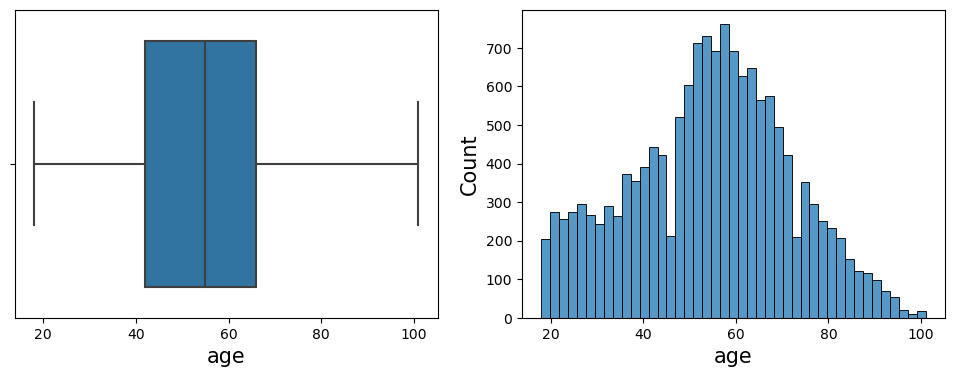

In [21]:
fig, axs = plt.subplots(1,2, figsize = (12,4))
sns.boxplot(data = profile, x = 'age', ax = axs[0])
sns.histplot(data = profile, x = 'age', ax = axs[1])
axs[0].xaxis.label.set_size(15)
axs[1].xaxis.label.set_size(15)
axs[1].yaxis.label.set_size(15)


##### Observations

* The youngest customer is 18 years old and the oldest is 101 years old.
* The age of the customers roughly follows a normal distribution with the mean and the standard deviation equal to 54 and 17.

### Create generations

In [22]:
def to_generation(age):
    if age < 20:
        return 'Teenager'
    elif age < 40:
        return 'Youth'
    elif age < 60:
        return 'Middle'
    elif age < 80:
        return 'Older'
    else:
        return 'Senior'

profile['generation'] = profile['age'].apply(to_generation)
profile.head()

,gender,age,id,became_member_on,income,generation
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,Middle
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,Older
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,Older
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,Older
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,Middle


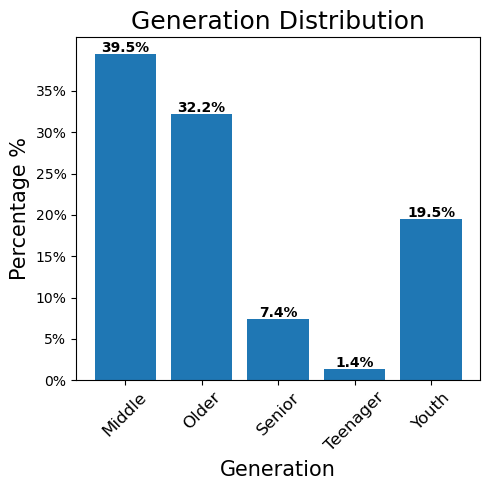

In [23]:
generation_group_percentage = (profile.value_counts('generation').sort_index() / profile.shape[0] * 100).round(1)
plt.figure(figsize = (5, 5))
yticks = np.arange(0,40,5)
yticklabels = [str(y) + '%' for y in yticks]
plt.yticks(yticks, labels = yticklabels)
plt.xticks(rotation = 45, fontsize = 12)
plt.xlabel('Generation', fontsize = 15)
plt.ylabel('Percentage %', fontsize = 15)
plt.title('Generation Distribution', fontsize = 18)

bar_plot = plt.bar(x = generation_group_percentage.index.values, height = generation_group_percentage)
for i,bar in enumerate(bar_plot.patches):
    x, y = bar.get_xy()
    plt.text(x+bar.get_width()/2, y+bar.get_height()+0.2,
            str(generation_group_percentage[i]) + '%',
            ha = 'center', weight = 'bold')

plt.tight_layout()
plt.show()

##### Observations

The largest age group of customers is the Middle group(40-60 years olds), closely followed by the Older group (60-80 years olds). The third largest age group is the Youth (20-40 years olds).
Top 2 age groups account for more than 70% of customers.

### Income

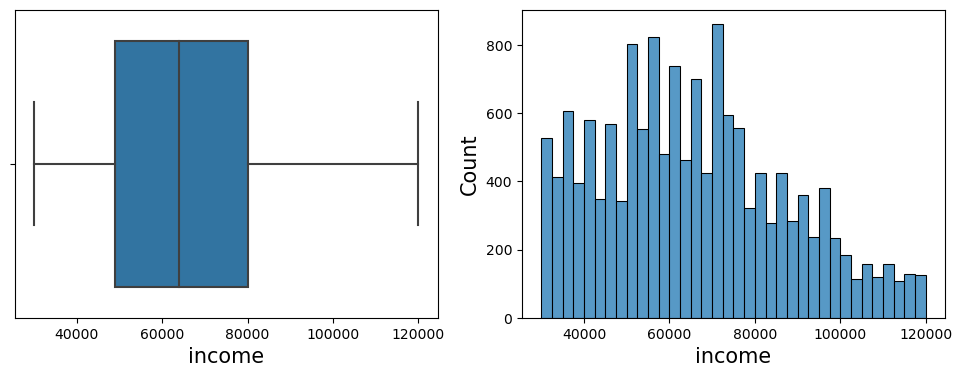

In [24]:
fig, axs = plt.subplots(1,2, figsize = (12,4))
sns.boxplot(data = profile, x = 'income', ax = axs[0])
sns.histplot(data = profile, x = 'income', ax = axs[1])
axs[0].xaxis.label.set_size(15)
axs[1].xaxis.label.set_size(15)
axs[1].yaxis.label.set_size(15)

### Create income groups

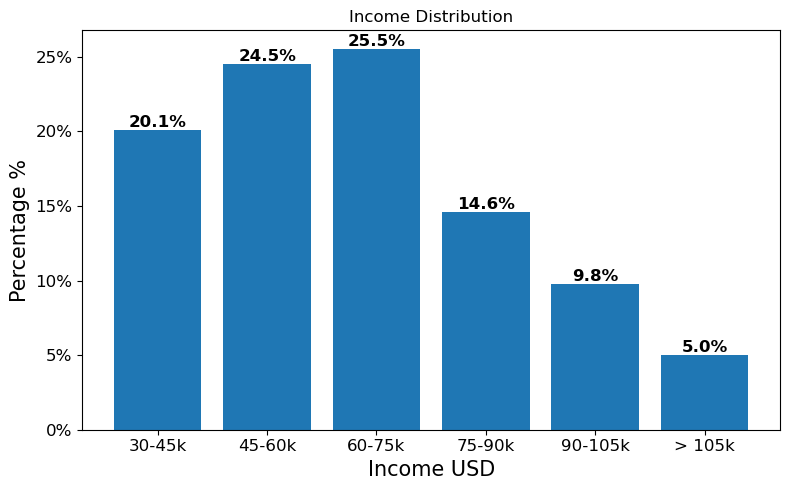

In [25]:
# Create a new column `income_group`
income_group = pd.cut(profile['income'],
      bins = [profile['income'].min(), 45000, 60000, 75000, 90000, 105000, profile['income'].max()],
      labels = ['30-45k', '45-60k', '60-75k', '75-90k', '90-105k', '> 105k'])
profile['income_group'] = income_group

# Visualize customers by income groups
income_group_percentage = (profile.value_counts('income_group').sort_index() / profile.shape[0] * 100).round(1)
plt.figure(figsize = (8, 5))
yticks = np.arange(0,30,5)
yticklabels = [str(y) + '%' for y in yticks]
plt.yticks(yticks, labels = yticklabels, fontsize = 12)
plt.xticks(fontsize = 12)
plt.xlabel('Income USD', fontsize = 15)
plt.ylabel('Percentage %', fontsize = 15)
plt.title('Income Distribution')

bar_plot = plt.bar(x = income_group_percentage.index.values, height = income_group_percentage)
for i,bar in enumerate(bar_plot.patches):
    x, y = bar.get_xy()
    plt.text(x+bar.get_width()/2, y+bar.get_height()+0.2,
            str(income_group_percentage[i]) + '%',
            ha = 'center', weight = 'bold', fontsize = 12)

plt.tight_layout()
plt.show()

##### Observations

Income of customers has a range of 30k to 120k, with an average of 65.4k.
Top 2 income groups consist of customers with annaul income of 60-75k and 45-60k. These account for approximately 50% of customers.
The income distribution among the customers may, to a large extent, in line with that over the whole population, except that people with extremely low income might find it hard to afford regular cafe visits, while people with extremely high income may prefer other ways to enjoy their coffee.

### Become member on

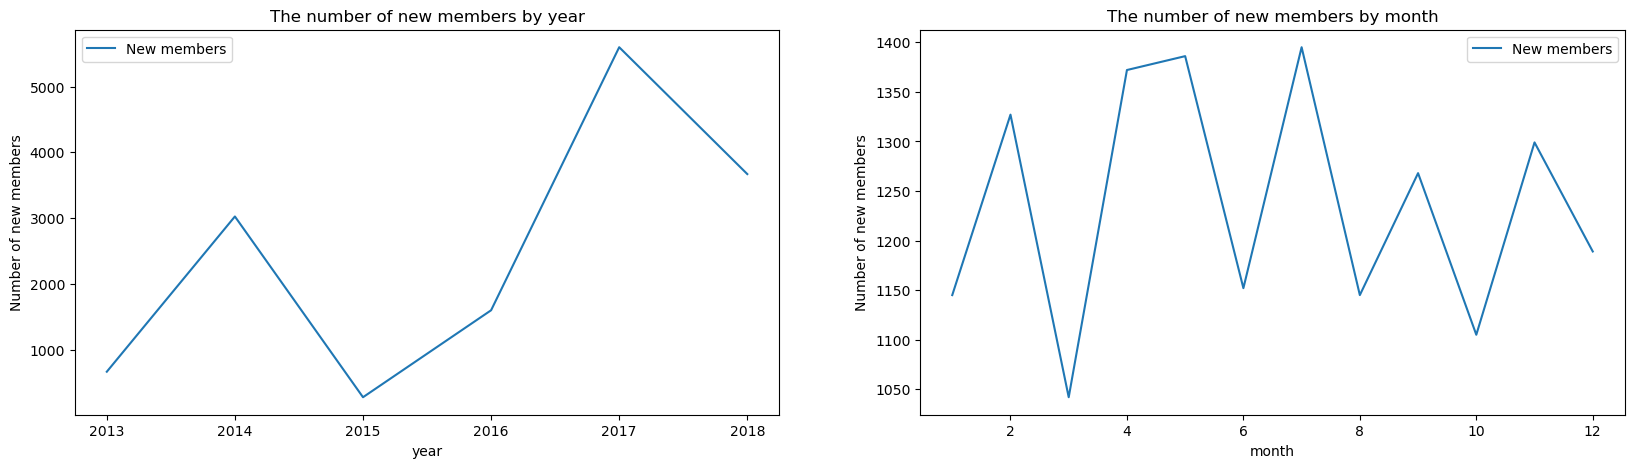

In [26]:
profile['year'] = pd.DatetimeIndex(profile['became_member_on']).year
profile['month'] = pd.DatetimeIndex(profile['became_member_on']).month

fig, axes = plt.subplots(1, 2, figsize=(20, 5))

for i, col in enumerate(['year', 'month']):
    sns.lineplot(ax=axes[i], x=profile[col].unique(), y=profile[col].value_counts(), label='New members')
    axes[i].set_title(f'The number of new members by {col}')
    axes[i].set_xlabel(f'{col}')
    axes[i].set_ylabel('Number of new members')
plt.show()

##### Observations

Based on the above graphs 2016 was the year where most people became a Starbucks member.
Regarding the months we can see that each high joining rate month is followed by a low joining rate month.
The data contains customers became members from July 2013 to July 2018.
Very few customers chose to become a member from 2013 to mid-2015.
The number of new members started to pick up from mid-2015 and really took off from mid-2017. The company must have had some sucessful compaigns around mid of 2015 and mid of 2017 that drastically boosted member growth.
The most popular was August, followed by October and December.
There were least new memebrs in Feburary on average.

It would be interesting to see on which days people tend to join more often compared to other days.
My prediction is Saturday.

### Member growth by weekday

In [27]:
# Create a time series with the number of new member on each day
df_member = profile[['id', 'became_member_on']]

# Add columns `year`, `month`, `day_of_week`
df_member = df_member.assign(year = df_member.became_member_on.dt.year,
                             month = df_member.became_member_on.dt.month,
                             day = df_member.became_member_on.dt.day,
                             month_name = df_member.became_member_on.dt.month_name(),
                             day_of_week = df_member.became_member_on.dt.weekday,
                             day_name = df_member.became_member_on.dt.day_name())
df_member.head()


,id,became_member_on,year,month,day,month_name,day_of_week,day_name
1,0610b486422d4921ae7d2bf64640c50b,2017-07-15,2017,7,15,July,5,Saturday
3,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,2017,5,9,May,1,Tuesday
5,e2127556f4f64592b11af22de27a7932,2018-04-26,2018,4,26,April,3,Thursday
8,389bc3fa690240e798340f5a15918d5c,2018-02-09,2018,2,9,February,4,Friday
12,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,2017,11,11,November,5,Saturday


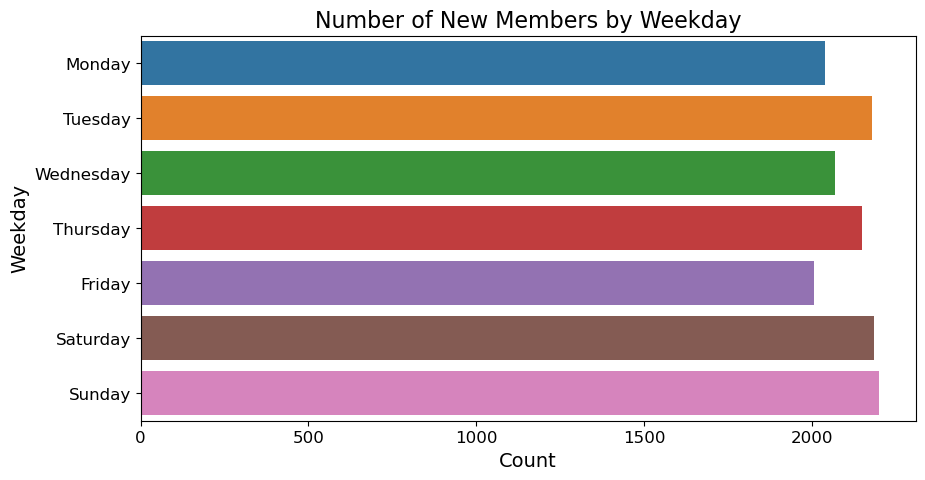

In [28]:
p = df_member.value_counts('became_member_on').sort_index()
df_member_growth = pd.DataFrame(index = p.index.values, data = p.values, columns = ['Number of New Members'])
plt.figure(figsize = (10,5))
sns.countplot(data = df_member.sort_values('day_of_week'), y = 'day_name')
plt.title('Number of New Members by Weekday', fontsize = 16)
plt.xticks(fontsize = 12); plt.yticks(fontsize = 12)
plt.xlabel('Count', fontsize = 14); plt.ylabel('Weekday', fontsize = 14)
plt.show()

##### Observations
In terms of days in a week, unsuprisingly, weekend saw the higher member growth than weekdays. Tuesday had the highest member growth among weekdays.
There were least new members on Friday on average.

## 2. EDA on portfolio

### Offer type by attributes

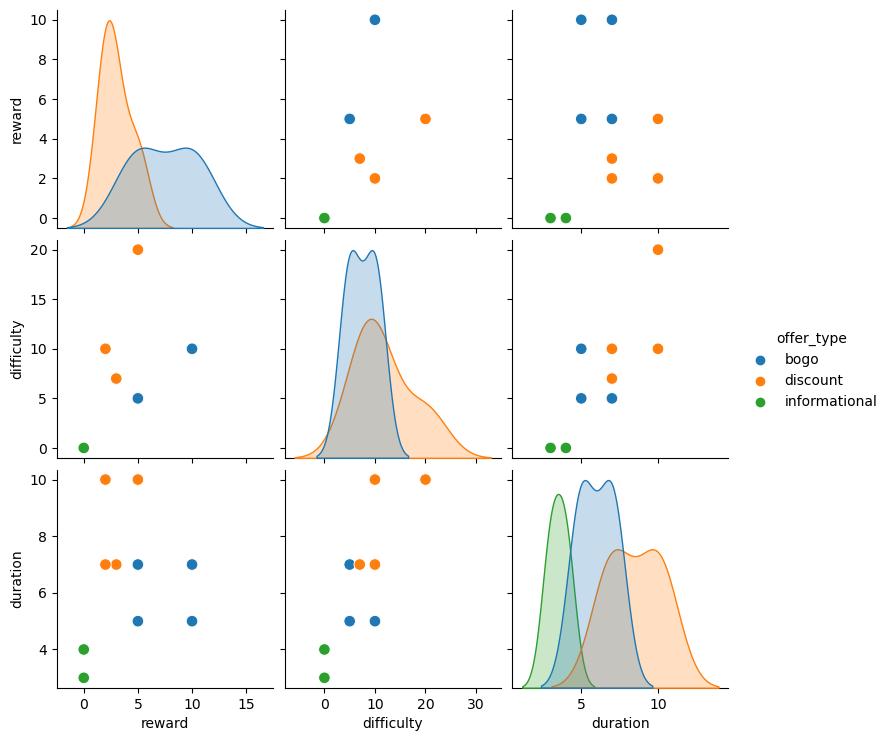

In [29]:
sns.pairplot(portfolio, hue = 'offer_type', 
             plot_kws = dict(marker="o", s=70),); plt.show()

##### Observations
There are 4 'bogo' offers (buy one get one), 4 'discount' offers and 2 'informational' offers.
'Discount' offers tend to have the longest duration, followed by 'bogo' offers. 'Informational' offers have the shortest duration.
'Discount' offers tend to have higher difficulty but lower rewards compared with 'bogo' offers.
Offer difficulty seems to be possitively correlated with offer reward.
Offer duration seems to negatively correlate with reward and positively correlate with difficulty, when 'informational' offers are exclued 

### Channels

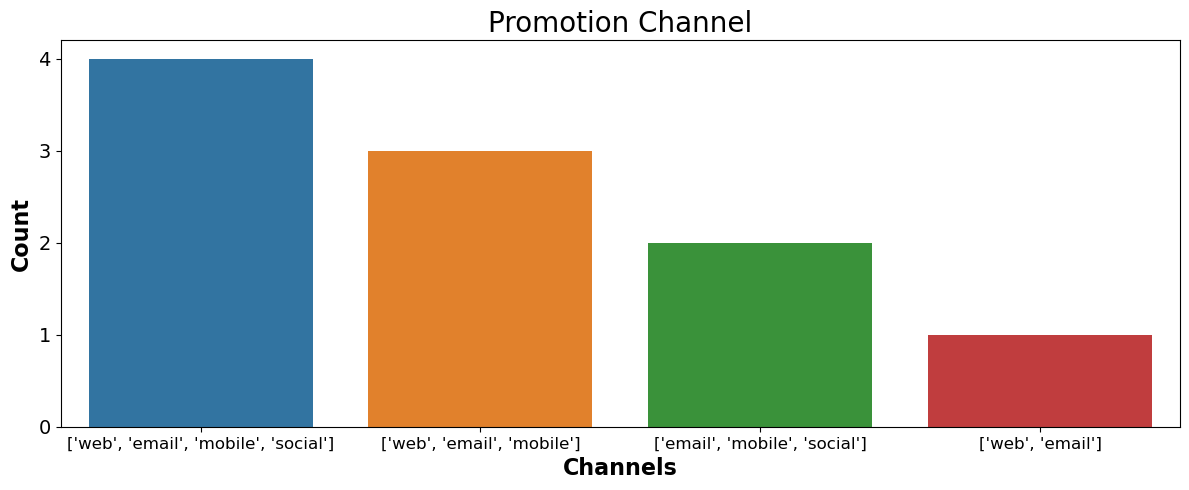

In [30]:
p = portfolio.value_counts('channels')
plt.figure(figsize = (12,5))
sns.barplot(x = p.index.values, y = p.values)
plt.xticks(rotation = None, fontsize = 12)
plt.yticks(np.arange(5), fontsize = 14)
plt.xlabel('Channels', fontsize = 16, fontweight = 'bold')
plt.ylabel('Count', fontsize = 16, fontweight = 'bold')
plt.title('Promotion Channel', fontsize = 20)
plt.tight_layout()
plt.show()

##### Observations

Offers were sent to customers through combinations of 4 types of promotion channels websites, email, mobile App and social. There are 4 combinations of channels used by the 10 offers.

### Correlation between marketing campaign attributes

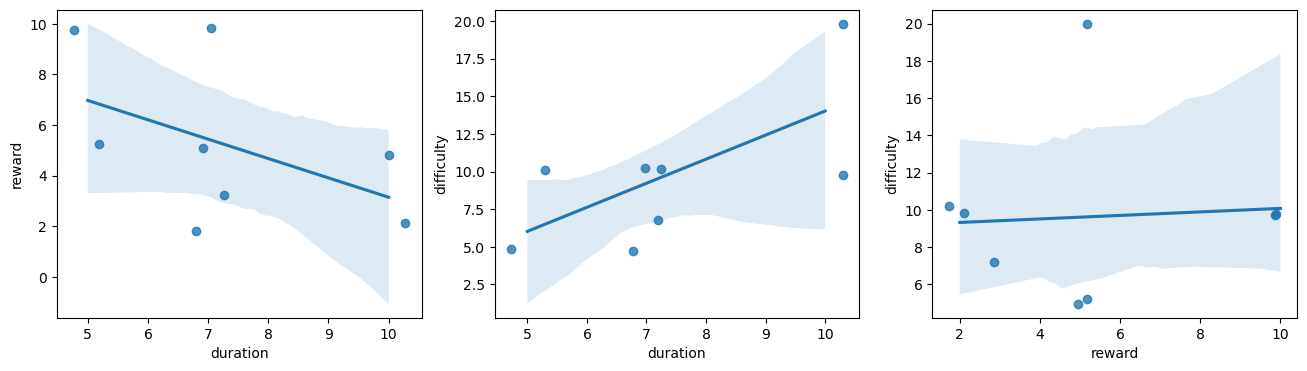

In [31]:
fig, axs = plt.subplots(1,3, figsize = (16,4))
sns.regplot(data = portfolio[0:8], x = 'duration', y ='reward', x_jitter = 0.3, y_jitter = 0.3, ax = axs[0])
sns.regplot(data = portfolio[0:8], x = 'duration', y ='difficulty', x_jitter = 0.3, y_jitter = 0.3, ax = axs[1])
sns.regplot(data = portfolio[0:8], x = 'reward', y ='difficulty', x_jitter = 0.3, y_jitter = 0.3, ax = axs[2])
plt.show()

##### Observations

There is a negative relationship between offer dutation and reward.
There is a positive relationship between offer dutation and difficulty.
Rewards and difficulty are not following any clear relation.

## EDA on transaction data

### Event

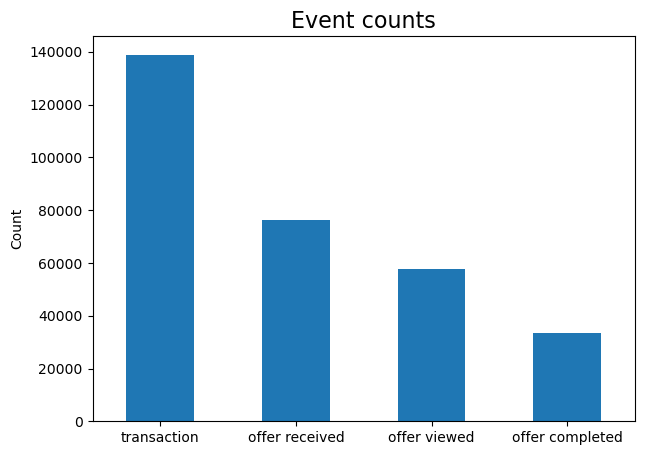

In [32]:
fig = plt.figure(figsize = (7,5))
transcript['event'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = None)
plt.ylabel('Count')
plt.title('Event counts', fontsize = 16)
plt.show()

## 3. Feature engeneering

### Create new attributes

From an action-oriented perspective, completing an offer requires two actions from the customers - to view it, then to complete it. Therefore, the overall completion rate is determined by two metrics:

* Completion rate (number of offers completed divided by number of offers viewed)
* View rate (number of offers viewed divided by number of offers received)

#### In this section, I will try to answer questions:

1. Which offers were the most popular?
2. What is the most important contributor to the view rate?
3. What is the most important contributor to the completion rate?

In [40]:
df_event = df_transcript_value_mod[~(df_transcript_value_mod['event'] == 'transaction')]

# Merge df_event with the offers
event_offer = pd.merge(df_event, portfolio, left_on = 'dict_value', right_on = 'id').drop('id', axis = 1)

# Reorder columns of the merged df
col_names = ['person', 'event', 'offer_alias', 'reward',
       'channels', 'difficulty', 'duration', 'offer_type', 'dict_key', 'dict_value',]
event_offer = event_offer[col_names]

# Drop column `dict_value`, as this is offer id which is hard to identify. This information is provided by column `offer_alias`
event_offer = event_offer.drop('dict_value', axis = 1)
event_offer.sample(3)

,person,event,offer_alias,reward,channels,difficulty,duration,offer_type,dict_key
141476,f072f72e1b6b4742934099cbd4c6bc98,offer received,C,10,"['email', 'mobile', 'social']",10,7,bogo,offer id
56537,8eb15bfe6dda4e3b806bcc93703f134e,offer received,F,2,"['web', 'email', 'mobile', 'social']",10,10,discount,offer id
67762,e973d133f6c547439dac45482d096241,offer viewed,D,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,offer id


### Overall Completion Rate (%)

In [36]:
# Find out the number of time being received for each offer 
offer_received = event_offer[event_offer['event'] == 'offer received']
offer_received_value = offer_received.value_counts('offer_alias').sort_values(ascending = False)

# Find out the number of time being completed for each offer 
offer_completed = event_offer[event_offer['event'] == 'offer completed']
offer_completed_value = offer_completed.value_counts('offer_alias').sort_values(ascending = False)

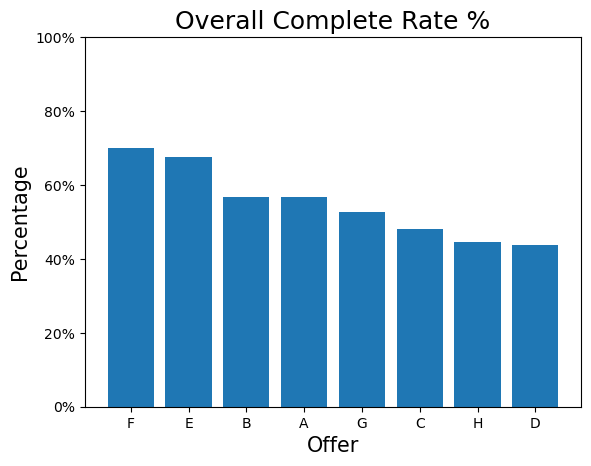

In [37]:
# Overall completion rate of each offer
overall_complete_rate = (offer_completed_value.sort_index() / offer_received_value.sort_index()).sort_values(ascending = False)

# Visualize
plt.bar(x = overall_complete_rate.index.values, height = overall_complete_rate.values)
plt.title('Overall Complete Rate %', fontsize = 18)
plt.xlabel('Offer', fontsize = 15)
plt.ylabel('Percentage', fontsize = 15)
plt.yticks(np.arange(0,1.2, 0.2), labels = ['0%', '20%', '40%', '60%', '80%', '100%'])
plt.show()

##### Note: Offers I and J are not included in the plot, becuase they are informational, therefore do not have event 'offer completed'.

##### Observations

The top 3 popular offers were Offer F, E and B, achieving an overall completion rate of 70%, 67.4% and 56.7%, respectively.
The least popular offer was Offer D, with an overall competion rate of around 44%. 

### View Rate (%)

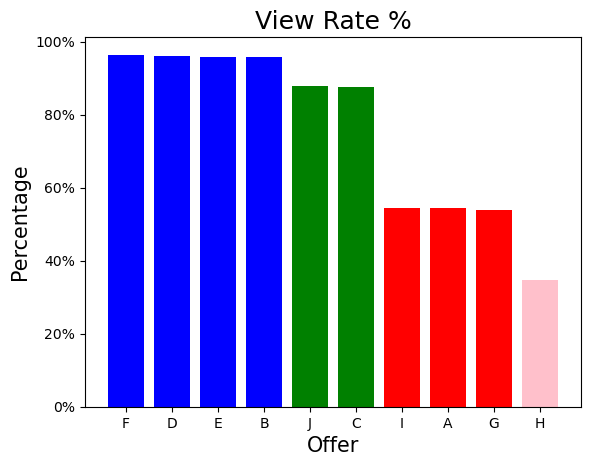

In [38]:
offer_viewed = event_offer[event_offer['event'] == 'offer viewed']
offer_viewed_value = offer_viewed.value_counts('offer_alias').sort_values(ascending = False)
offer_viewed_value_rate = (offer_viewed_value.sort_index() / offer_received_value.sort_index()).sort_values(ascending = False)
plt.bar(x = np.arange(len(offer_viewed_value)), height = offer_viewed_value_rate.values, tick_label = offer_viewed_value_rate.index.values,
       color = ['blue', 'blue','blue', 'blue', 'green', 'green','r', 'r', 'r', 'pink'])
plt.title('View Rate %', fontsize = 18)
plt.xlabel('Offer', fontsize = 15)
plt.ylabel('Percentage', fontsize = 15)
plt.yticks(np.arange(0,1.2, 0.2), labels = ['0%', '20%', '40%', '60%', '80%', '100%'])
plt.show()

* F D E B -->email, mobile, social, web
* J C -->email, mobile, social
* I A G -->email, mobile, web
* H-->email, web


#### Conclusion

Offers sent through the same promotion channels had very similar view rate, despite of the difference in other factors (offer type, duration, reward and difficulty). Therefore, promotion channels is the most important factor on the offer view rate.
All channels contributed to offer view rate. However, their importance clearly differs:

* Social Media > Email >= Mobile > Websites

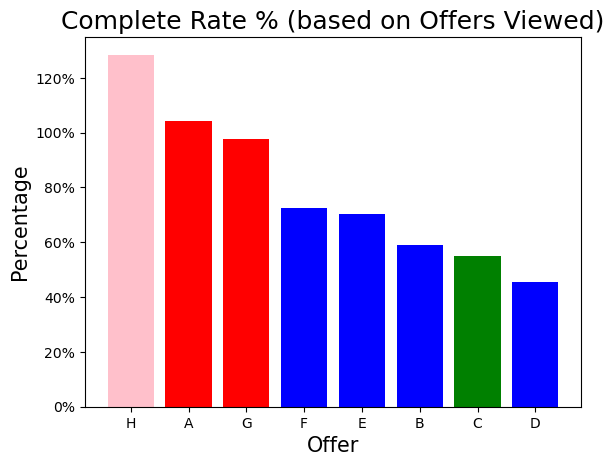

In [39]:
offer_completed_value = offer_completed.value_counts('offer_alias').sort_values(ascending = False)

offer_completed_value_rate = (offer_completed_value.sort_index() / offer_viewed_value.sort_index()).sort_values(ascending = False)
color_list = ['pink', 'red', 'red', 'blue', 'blue', 'blue', 'green', 'blue']
plt.bar(x = offer_completed_value_rate.index.values, height = offer_completed_value_rate.values, color = color_list)
plt.title('Complete Rate % (based on Offers Viewed)', fontsize = 18)
plt.xlabel('Offer', fontsize = 15)
plt.ylabel('Percentage', fontsize = 15)
plt.yticks(np.arange(0,1.4, 0.2), labels = ['0%', '20%', '40%', '60%', '80%', '100%', '120%'])
plt.show()

##### Observations

For offers that have been viewed, the completion rate rages from 46% to 128%.
Offers H and A both achived a completion rate of over 100%! This means on average they were completed by customers more than once.
For offers with 5 top completion rate, all are of type 'discount', with Offer A being the only exception. 

* This reveals that customers preferred 'dicount' type to 'bogo'.

## Final Conclusions

* The main factor influencing offer completion rate is the offer type, 'Discount' > 'bogo'.

* The most popular offers were Offers F, E and B. They achieved an overall completion rate of 70%, 67.4% and 56.7%, respectively.
* The most important contributor to the view rate was the promotion channel. All channels led to clicks on offers, however had distinct effectiveness: Social Media > Email >= Mobile > Company Website.
* The most important factor that affects the completion rate was the offer type. Customers preferred 'discount' offers to 'bogo' offers.


## The company should send offers to customers through as many channels as possible. However, if the budget is tight, social media is the first choose as customers are most likely to view from there. 'Discount' is the offer type to choose as it leads to high offer completion rate.